In [70]:
# Name: Ritik Madaan; Reg NO: 11801737; Roll NO: A07

import pandas as pd
import numpy as np
filename = "haberman.csv"
df = pd.read_csv(filename, header = None, names = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status'])
df.head()

,Age,Year operation,Axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [71]:
df.describe()

,Age,Year operation,Axillary nodes detected,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


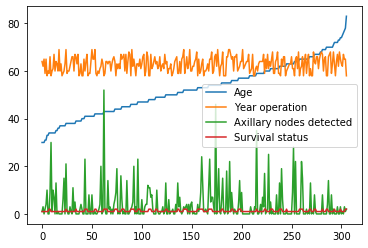

In [72]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

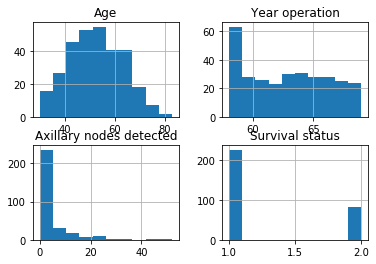

In [73]:
df.hist()
plt.show()

In [74]:
y = df['Survival status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
y_test.value_counts()

1    58
2    34
Name: Survival status, dtype: int64

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection
seed = 7
models = []
models.append(('SVM', SVC(kernel = 'linear', gamma = 'auto')))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators = 10)))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.76 (0.11)
NB: 0.78 (0.13)
RF: 0.74 (0.11)


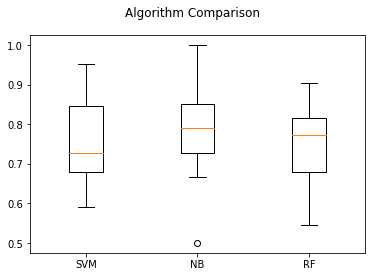

In [76]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn =  GaussianNB()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, predictions))
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.6521739130434783
Confusion Matrix: 
 [[56  2]
 [30  4]]
              precision    recall  f1-score   support

           1       0.65      0.97      0.78        58
           2       0.67      0.12      0.20        34

    accuracy                           0.65        92
   macro avg       0.66      0.54      0.49        92
weighted avg       0.66      0.65      0.56        92

